## Plot the BBB of an arbitrary object
### To run this notebook, please [follow the instructions](https://lasair-lsst.readthedocs.io/en/main/core_functions/python-notebooks.html) or else it won`t work.
The instructions are at https://lasair-lsst.readthedocs.io/en/main/core_functions/python-notebooks.html

This notebook uses the Lasair API. Please copy the `settings_template.py` to `settings.py`, 
then put in your own API Token from the profile (top right) of the web Lasair page.

In [26]:
import json, sys, math
from IPython.display import Image, display
import settings

In [27]:
%%bash
if [ ! -d "lasair-lsst" ] ; then
    git clone https://github.com/lsst-uk/lasair-lsst.git
fi

In [28]:
import importlib  
BBBcode = "lasair-lsst.pipeline.filter.features.BBBEngine"
BBBEngine = importlib.import_module(BBBcode)

In [29]:
# !pip3 install lasair
from lasair import LasairError, lasair_client as lasair
import settings
L = lasair(settings.API_TOKEN, endpoint="https://api.lasair-lsst-dev.lsst.ac.uk/api")

In [30]:
def runBBB(diaObjectId):
    alert = L.object(diaObjectId, lite=False, lasair_added=False)
    BE = BBBEngine.BBB('LSST', nforced=4, ebv=0, A=100, T=4, t0=6, kr=0.1, kf=0.01, verbose=False)
    fit =  BE.make_fit(alert)
    if fit:
        filename = '../image/%s.png' % str(diaObjectId)
        BE.plot(alert, fit, filename, size=5)
        display(Image(filename=filename))

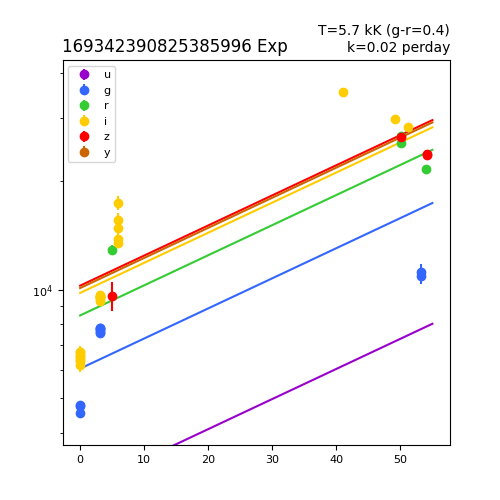

In [31]:
runBBB(169342390825385996)